<a href="https://colab.research.google.com/github/Junaiis/29766junais/blob/main/Super_Store_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/train.csv')

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [23]:
# Remove unnecessary columns
df.drop(columns=["Row ID", "Order ID", "Customer ID", "Country",
                 "Product ID", "Product Name", "Customer Name", "Postal Code"], axis=1, inplace= True)

In [24]:
df['Category'].value_counts()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


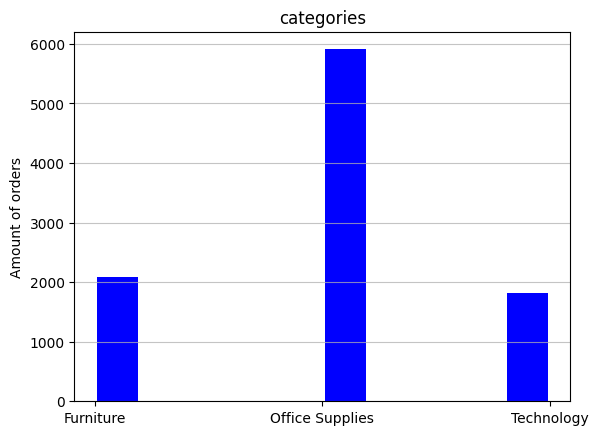

In [25]:
plt.hist(df.Category, bins=10, rwidth=0.9, color="b")
plt.title("categories")
plt.ylabel("Amount of orders")
plt.grid(axis="y", alpha=0.75);

In [26]:
df.City.nunique()

529

In [27]:
df.drop(columns=["City", "Region"], inplace=True)

In [28]:
# dates fixing
df["Order Date"] = pd.to_datetime(df["Order Date"], format = "%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format = "%d/%m/%Y")

df['Month_order'] = df['Order Date'].dt.to_period('M')

df['Year_order'] = df['Order Date'].dt.to_period('Y')

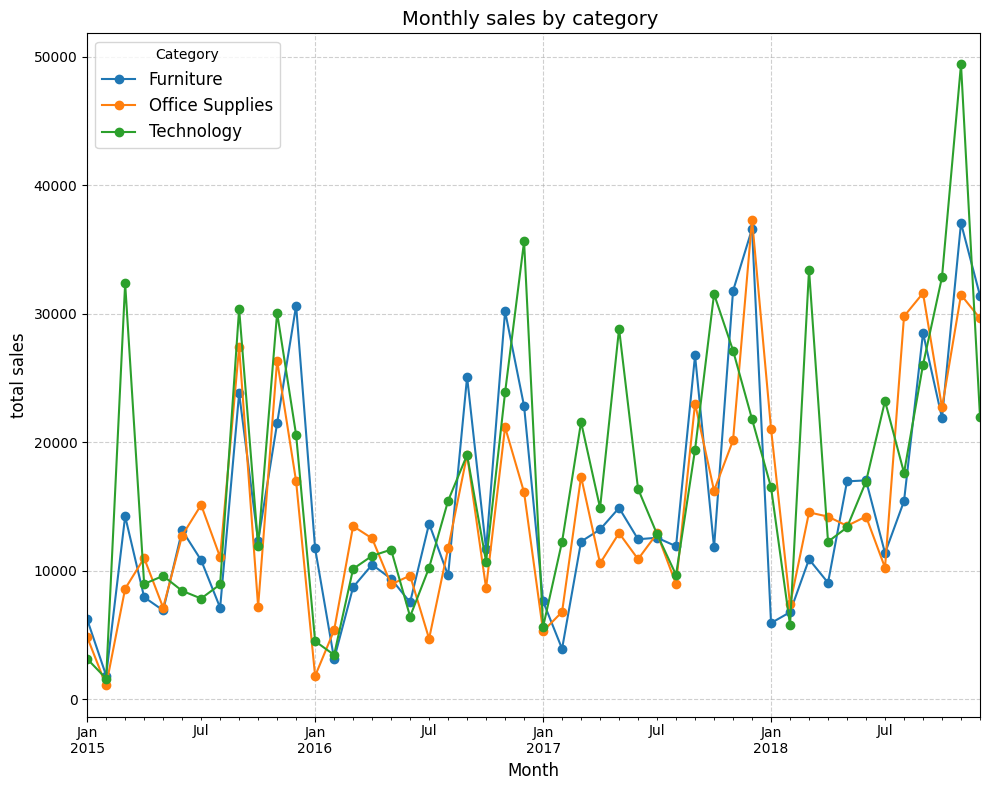

In [29]:
# month sales analysis
monthSalesByCategory = df.groupby(["Month_order", "Category"])["Sales"].sum().unstack()


monthSalesByCategory.plot(kind="line", marker="o", figsize=(10, 8))
plt.title("Monthly sales by category ", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("total sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category", fontsize=12)
plt.tight_layout()

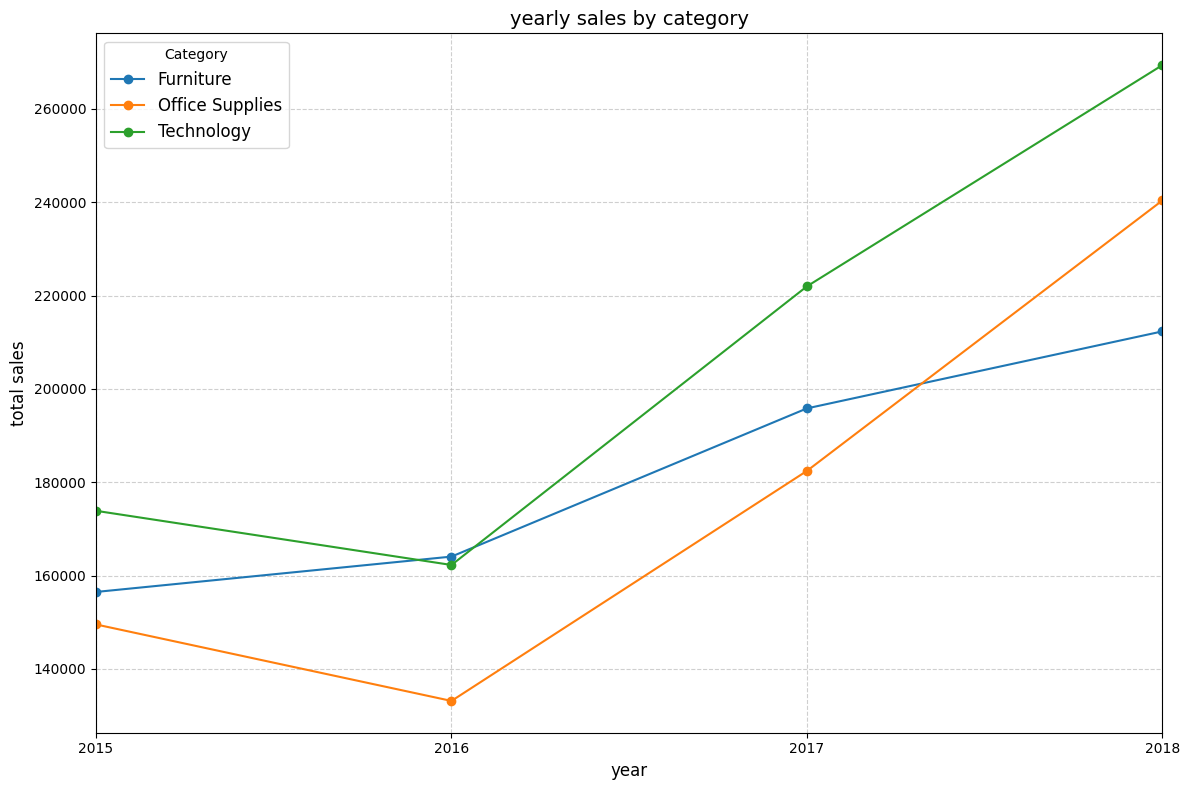

In [30]:
# 4 year sales analysis
yearlyOrder = df.groupby(["Year_order", "Category"])["Sales"].sum().unstack()

yearlyOrder.plot(kind="line", marker="o", figsize=(12, 8))
plt.title("yearly sales by category", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("total sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category", fontsize=12)
plt.tight_layout()

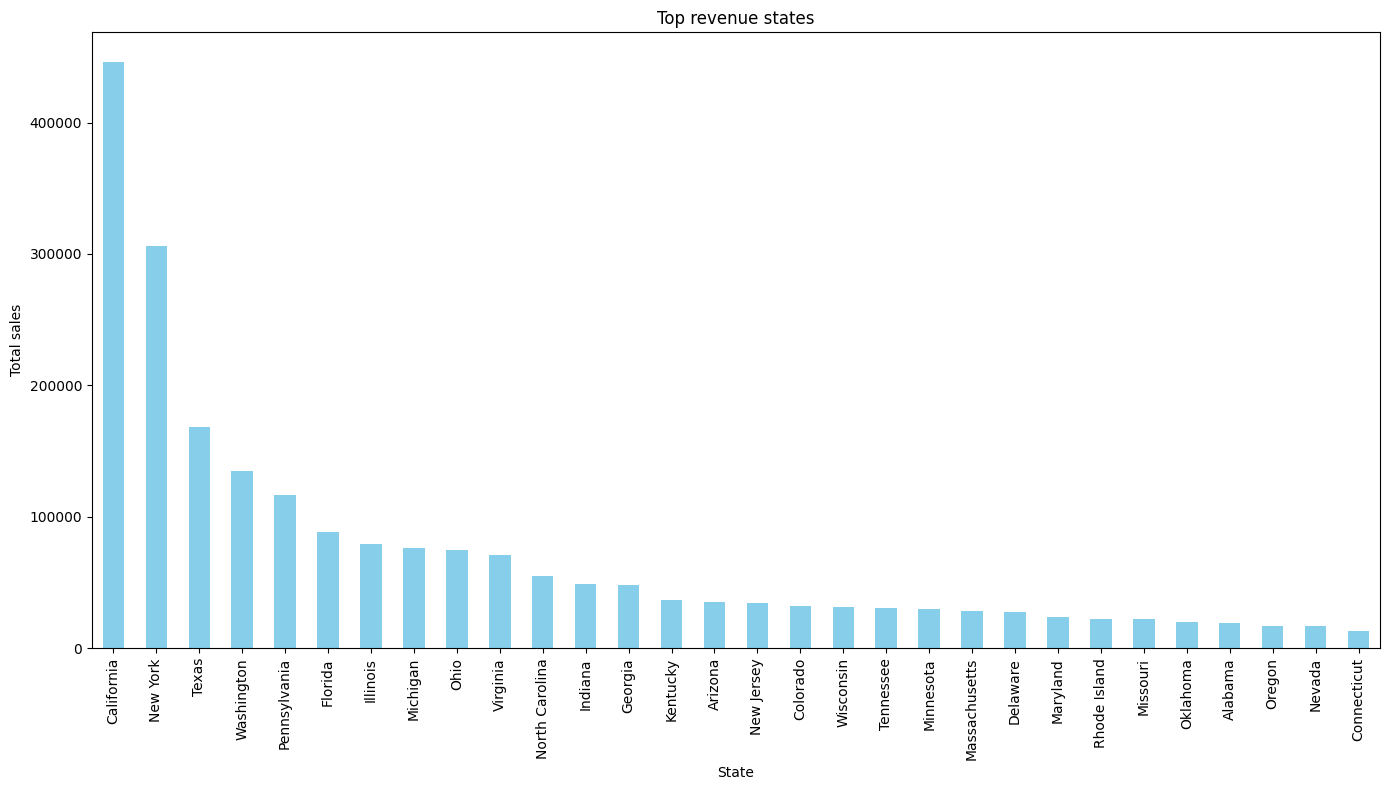

In [31]:
# analysis of top 30 states by revenue
salesState = df.groupby("State")["Sales"].sum()

salesState = salesState.sort_values(ascending=False).head(30)


plt.figure(figsize=(14, 8))
salesState.plot(kind='bar', color='skyblue')
plt.title('Top revenue states')
plt.xlabel('State')
plt.ylabel('Total sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
total_sales = salesState.sum()

percentagePerState = salesState / total_sales * 100
percentagePerState

,Sales
State,
California,20.707678
New York,14.214511
Texas,7.821410
Washington,6.273312
Pennsylvania,5.394991
Florida,4.103268
Illinois,3.676407
Michigan,3.532553
Ohio,3.485890


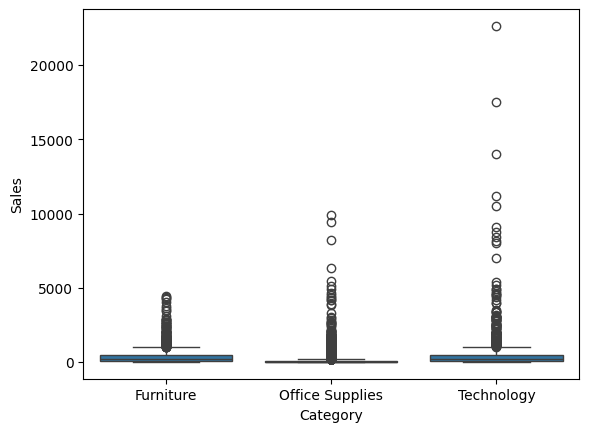

In [33]:
# Outliers shown in boxplot
sns.boxplot(x='Category', y='Sales', data=df)
plt.show()

In [34]:
# Clean up outliers using the interquartile range
column = "Sales"


Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5 * IQR
sup_lim = Q3 + 1.5 * IQR

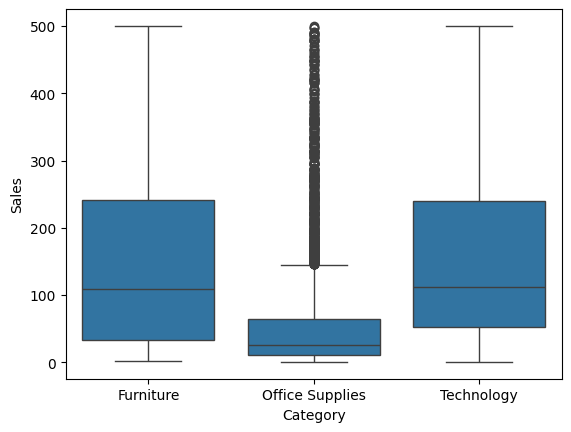

In [35]:
# cleaned dataframe boxplot
df_clean = df[(df[column] >= inf_lim) & (df[column] <= sup_lim)].copy()
sns.boxplot(x='Category', y='Sales', data=df_clean)
plt.show()

In [36]:
df_clean.apply(lambda x: x.nunique())

,0
Order Date,1217
Ship Date,1309
Ship Mode,4
Segment,3
State,48
Category,3
Sub-Category,17
Sales,4831
Month_order,48
Year_order,4


In [37]:
# turn the dates from periods to float for the correlation matrix

df_clean['Year_order'] = df_clean['Order Date'].dt.year
df_clean['Month_order'] = df_clean['Order Date'].dt.month
df_clean.drop(columns=["Order Date", "Ship Date"], inplace=True)


df_encoded = pd.get_dummies(df_clean, drop_first=True)

In [38]:
df_encoded

,Sales,Month_order,Year_order,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.960,11,2017,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,14.620,6,2017,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,22.368,10,2016,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,48.860,6,2015,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,7.280,6,2015,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,3.798,5,2017,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9796,10.368,1,2016,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9797,235.188,1,2016,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9798,26.376,1,2016,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [39]:
correlation_matrix = df_encoded.corr()

correlation_matrix.describe()

,Sales,Month_order,Year_order,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.017161,0.011347,0.013396,0.006846,0.004565,0.001895,0.009708,0.011847,0.001874,0.007104,...,0.005651,0.005408,-0.010741,0.002728,0.011686,-0.003694,0.006928,0.002524,0.006535,0.005400
std,0.146850,0.118680,0.118270,0.124474,0.139084,0.142708,0.123731,0.123669,0.119577,0.118159,...,0.121164,0.121305,0.136548,0.123102,0.120795,0.135110,0.153796,0.127123,0.120066,0.123928
min,-0.391760,-0.045786,-0.051662,-0.293978,-0.598068,-0.598068,-0.302155,-0.302155,-0.077758,-0.038992,...,-0.075900,-0.109937,-0.463509,-0.112558,-0.103650,-0.189032,-0.393237,-0.130749,-0.062682,-0.191889
25%,-0.012998,-0.014532,-0.012994,-0.010365,-0.011651,-0.009565,-0.011792,-0.008030,-0.018084,-0.010909,...,-0.017171,-0.012849,-0.017523,-0.015670,-0.010249,-0.020181,-0.012749,-0.015453,-0.011111,-0.012257
50%,0.001777,0.001255,0.001234,-0.004477,0.001003,0.002777,0.000614,0.002850,-0.010117,-0.005841,...,-0.005213,-0.005343,-0.003836,-0.005447,-0.004020,-0.001895,-0.005385,-0.005498,-0.004447,-0.005719
75%,0.013901,0.009655,0.010224,0.008941,0.007606,0.013505,0.011060,0.015129,-0.002915,-0.002388,...,0.004962,0.006234,0.005522,0.003908,0.000391,0.009242,0.008567,0.004736,0.004841,0.001653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# only positive correlations
positiveCorrelation = correlation_matrix[correlation_matrix > 0]

positiveCorrelation.describe()

,Sales,Month_order,Year_order,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
count,39.000000,37.000000,39.000000,29.000000,38.000000,41.000000,40.000000,40.000000,15.000000,10.000000,...,28.000000,28.000000,28.000000,28.000000,20.000000,31.000000,29.000000,28.000000,24.000000,21.000000
mean,0.071699,0.038389,0.037282,0.047808,0.039658,0.036679,0.036009,0.039067,0.075020,0.107500,...,0.048770,0.048254,0.043267,0.048377,0.071042,0.052730,0.071984,0.055737,0.053197,0.065541
std,0.169901,0.162807,0.158552,0.183501,0.160601,0.154444,0.156603,0.156185,0.255918,0.313640,...,0.187853,0.187749,0.187587,0.188585,0.222619,0.184164,0.217183,0.190052,0.202690,0.218495
min,0.001138,0.001255,0.000058,0.001153,0.000336,0.000099,0.000024,0.000273,0.003714,0.000734,...,0.000329,0.000519,0.000099,0.000037,0.000126,0.000024,0.000765,0.000611,0.000871,0.000273
25%,0.005940,0.003159,0.003885,0.006262,0.003586,0.005567,0.004078,0.006886,0.006249,0.005013,...,0.004140,0.005022,0.004210,0.002516,0.003821,0.005574,0.005071,0.003451,0.005298,0.003252
50%,0.012974,0.009655,0.009011,0.011788,0.007578,0.012310,0.010523,0.010422,0.008736,0.007293,...,0.006515,0.007728,0.008189,0.007014,0.007879,0.009990,0.009562,0.009233,0.006483,0.010557
75%,0.038039,0.016830,0.018326,0.020444,0.020476,0.020043,0.018256,0.022022,0.011537,0.015093,...,0.017590,0.014136,0.011577,0.014310,0.018824,0.017276,0.014186,0.015827,0.010038,0.016167
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
